In [1]:
# Import all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Data using
df = pd.read_csv(r'austo_automobile.csv')
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,24,Male,Salaried,Married,Post Graduate,4,No,Yes,Yes,52000,25000,77000,18000,Hatchback
1,28,Male,Salaried,Married,Post Graduate,3,No,Yes,No,68000,0,68000,18000,Hatchback
2,23,Male,Salaried,Married,Graduate,4,Yes,Yes,No,31000,0,31000,18000,Hatchback
3,26,Male,Business,Married,Post Graduate,4,Yes,Yes,Yes,66000,35000,101000,18000,Hatchback
4,28,Male,Business,Married,Post Graduate,4,Yes,No,No,64000,0,64000,18000,Hatchback


# 1. Data Understanding & Cleaning

#### - Inspect dataset shape, data types, and summary statistics

In [3]:
df.shape

(1581, 14)

There are 1581 rows and 14 columns in the dataset

In [4]:
df.dtypes

Age                 int64
Gender                str
Profession            str
Marital_status        str
Education             str
No_of_Dependents    int64
Personal_loan         str
House_loan            str
Partner_working       str
Salary              int64
Partner_salary      int64
Total_salary        int64
Price               int64
Make                  str
dtype: object

There are 6 numerical variables and 8 categorical variables

In [5]:
df.describe().round(2)

,Age,No_of_Dependents,Salary,Partner_salary,Total_salary,Price
count,1581.00,1581.00,1581.00,1581.00,1581.00,1581.00
mean,32.21,2.46,59732.45,19720.43,79452.88,35597.72
std,9.13,0.94,14278.64,19480.21,24855.94,13633.64
min,22.00,0.00,30000.00,0.00,30000.00,18000.00
25%,25.00,2.00,51000.00,0.00,61000.00,25000.00
50%,29.00,2.00,59000.00,25000.00,78000.00,31000.00
75%,38.00,3.00,71000.00,38000.00,96000.00,47000.00
max,60.00,4.00,90000.00,80000.00,158000.00,70000.00


Most(75%) customers are under the age of 40. Atleast 25% of customer's partners don't have income. Majority(75%) of cars are under the price of 50,000. 
Ranges for numerical variables varies from 0-4 to 30,000-158,000. So we might have to standardized it later to avoid biasness.

#### - Identify and handle missing values

In [6]:
df.isna().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

There are no missing values in the dataset.

In [7]:
df.duplicated().sum()

np.int64(0)

There are no duplicate values.

#### - Detect and comment on outliers

In [8]:
# Show all numerical variables
df.select_dtypes(include=['number']).columns

Index(['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary',
       'Price'],
      dtype='str')

In [9]:
for col in ['Age', 'No_of_Dependents', 'Salary', 'Partner_salary', 'Total_salary', 'Price']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(len(outliers))

29
20
0
0
14
0


The total numbers of outliers for 'Age', 'No_of_Dependents' and 'Total_salary' are 29, 20 and 14 respectively. Whereas, there are no outliers for 'Salary', 'Partner_salary', 'Price'. We will understand about outliers more clearly below.

# 2. Univariate Analysis

#### Histograms

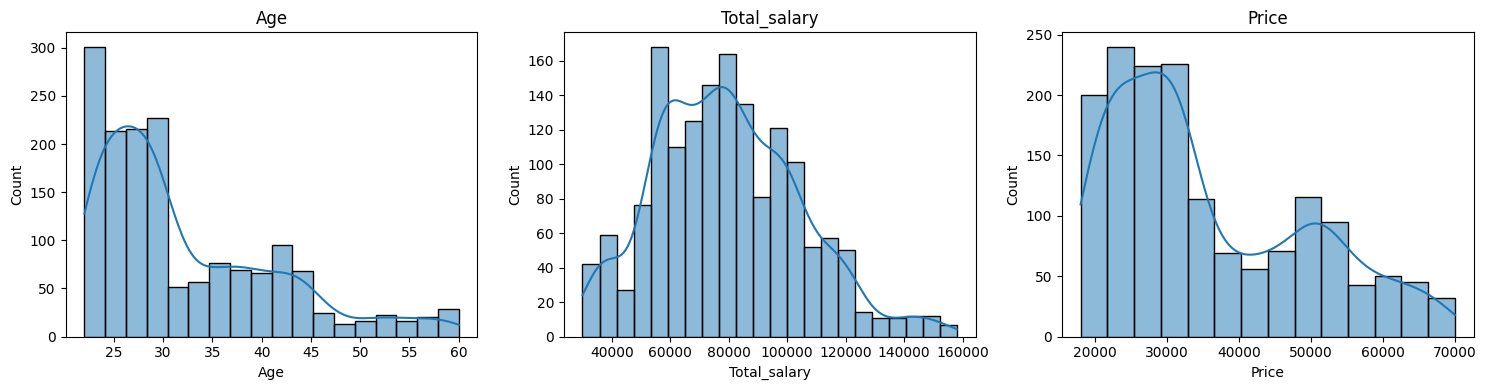

In [10]:
cols = ['Age', 'Total_salary', 'Price'] 
plt.figure(figsize=(15, 4))  
for i, col in enumerate(cols, 1): 
    plt.subplot(1, 3, i) # 1 row, 3 columns 
    sns.histplot(df[col], kde=True) 
    plt.title(col) 

plt.tight_layout() 
plt.show()

'Age' and 'Price' are rightly skewed and 'Total_salary' is almost normally distributed.

#### Boxplots

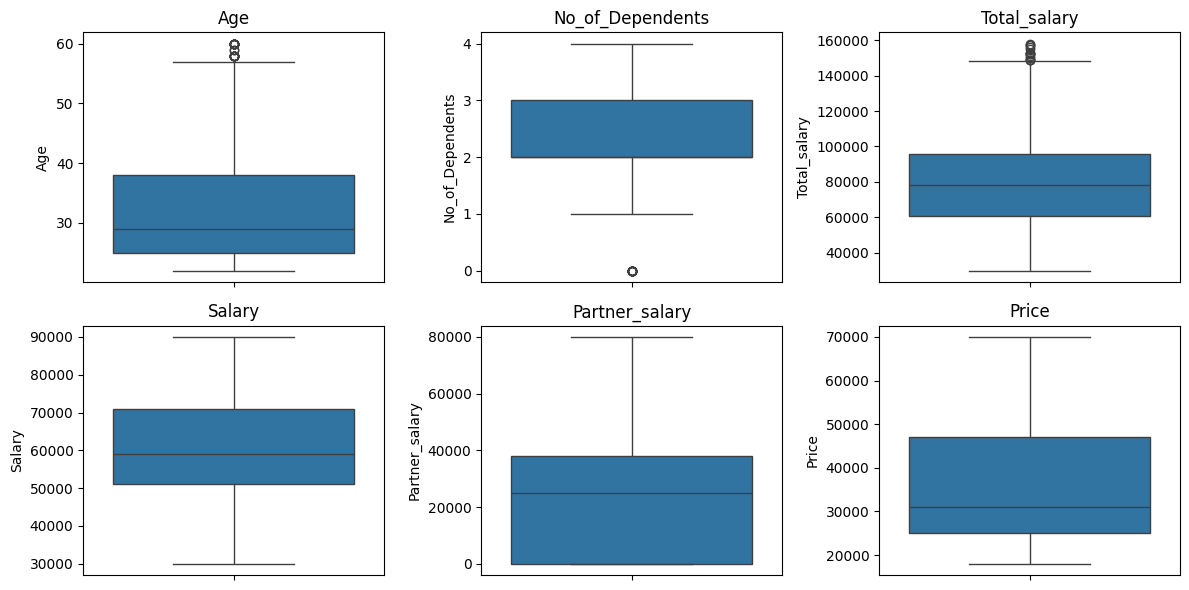

In [11]:
plt.figure(figsize=(12,6))
for idx, col in enumerate(['Age', 'No_of_Dependents', 'Total_salary', 'Salary', 'Partner_salary', 'Price'], start=1):
    plt.subplot(2, 3, idx)
    sns.boxplot(y=col, data=df)
    plt.title(col)

plt.tight_layout()
plt.show()

Like we found earlier, we can see 'Age', 'No_of_Dependents' and 'Total_salary' have outliers. Whereas, 'Salary', 'Partner_salary' and 'Price' don't have outliers. Here, we can see more clearly that all outliers are valid (age upto 60, 0 number of dependents and 160,000 salary are all real). So we are not going to get rid of them. 

#### Countplots

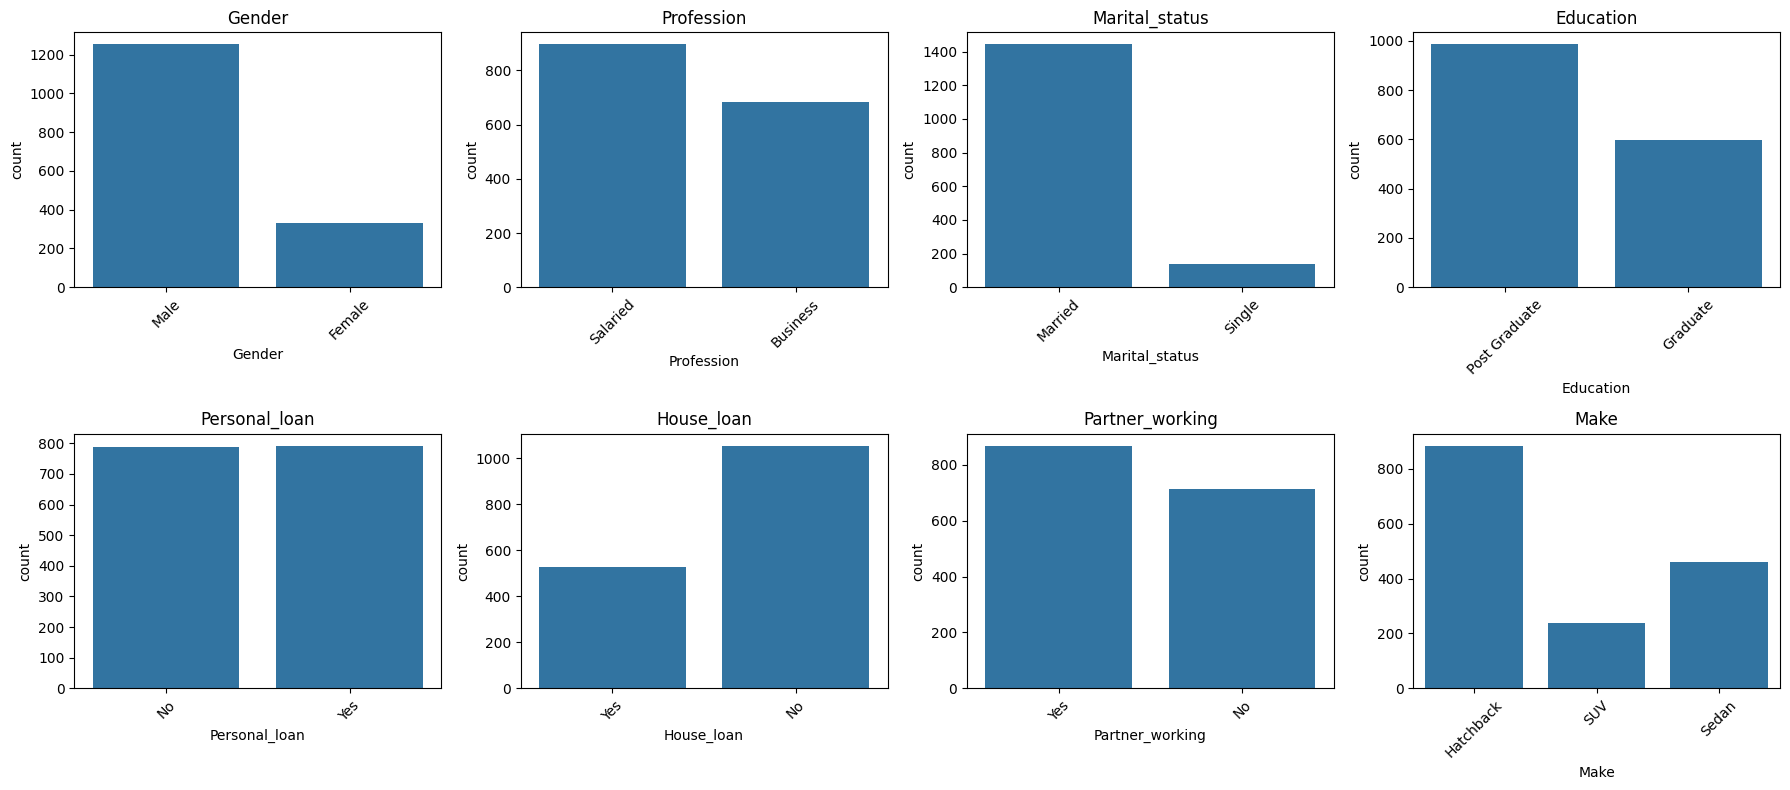

In [12]:
cols = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working', 'Make']

plt.figure(figsize=(18, 8))
for idx, col in enumerate(cols, start=1):
    plt.subplot(2, 4, idx)
    sns.countplot(x=col, data=df)
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Male customers are more than 3 times the female customers. 
Salaried customers are slightly more than customers having their business. 
Married customers are more than 7 times the single customers.
Customers who are Post Graduate are more than just Graduate.
Customers with or without Personal loan are almost on same numbers.
Customers without House loan are more than by atleast 200 than with House loan.
Customer with Partner working are slightly more than without Partner working.
Hatchback is the most popular and suv is the least popular among the customers.

# 3. Bivariate Analysis

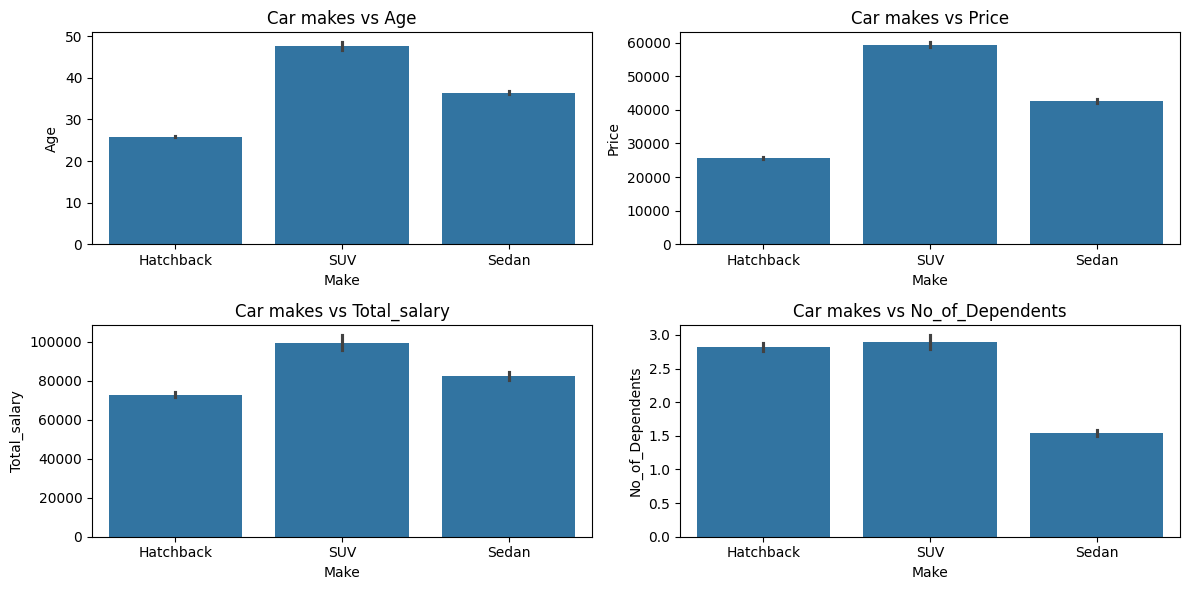

In [13]:
plt.figure(figsize=(12, 6))
variables = ['Age', 'Price', 'Total_salary', 'No_of_Dependents']

for idx, var in enumerate(variables, 1):
    plt.subplot(2, 2, idx)
    sns.barplot(x='Make', y=var, data=df)
    plt.title(f'Car makes vs {var}')
    plt.xlabel('Make')
    plt.ylabel(var)

plt.tight_layout()
plt.show()

In avergae, SUV is owned by the oldest age group and Hatchback is owned by the youngest age group.
In average, SUV has the highest price and Hatchback has the lowest price.
In average, SUV are owned by the customers with highest Total salary and Hatchback are owned by the customers with lowest Total salary.
In average, SUV are owned by the customers with highest Number of dependents, Hatchback is close second to SUV and Sedan are owned by the customers with the lowest Number of dependents.

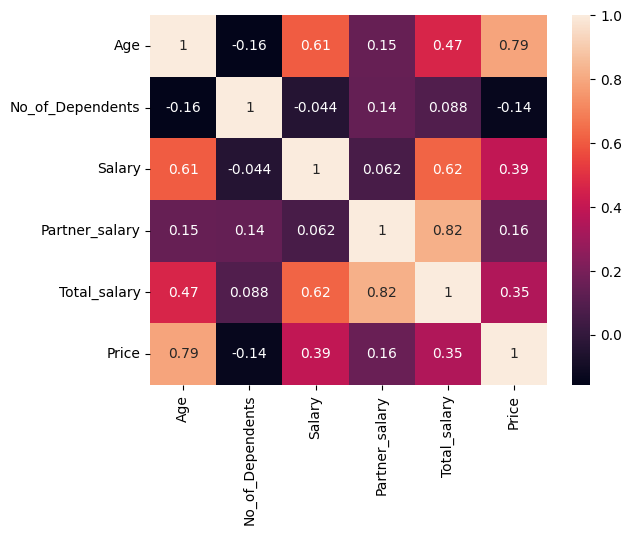

In [14]:
df_corr = df.corr(numeric_only=True)
sns.heatmap(df_corr, annot=True)
plt.show()

Here, Age and Price have high correlation value of 0.79 which means as the Age of customers increases they have cars of higher prices and vice-versa. Also, Total salary and Partner salary have high correlation value of 0.82 which means Total salary decreases when Partner salary decreases and vice-versa. All the other variables have low correlation values with each other so it doesn't make much impact. Note- eventhough heat map is used for multivaraite analysis, I'm using it for bivariate analysis since I'm using two variables at a time.

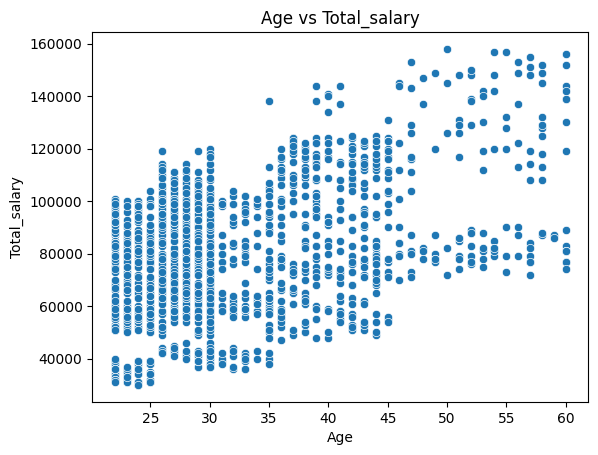

In [ ]:
# Scatterplot
sns.scatterplot(data=df, x='Age', y='Total_salary')
plt.title('Age vs Total_salary')
plt.show()

The above scatterplot shows there is not strong correlation between age and total salary. We have r value of 0.47 (from heatmap) which validate the same thing. 

In [16]:
# Show all categorical variables
df.select_dtypes(include=['string']).columns

Index(['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan',
       'House_loan', 'Partner_working', 'Make'],
      dtype='str')

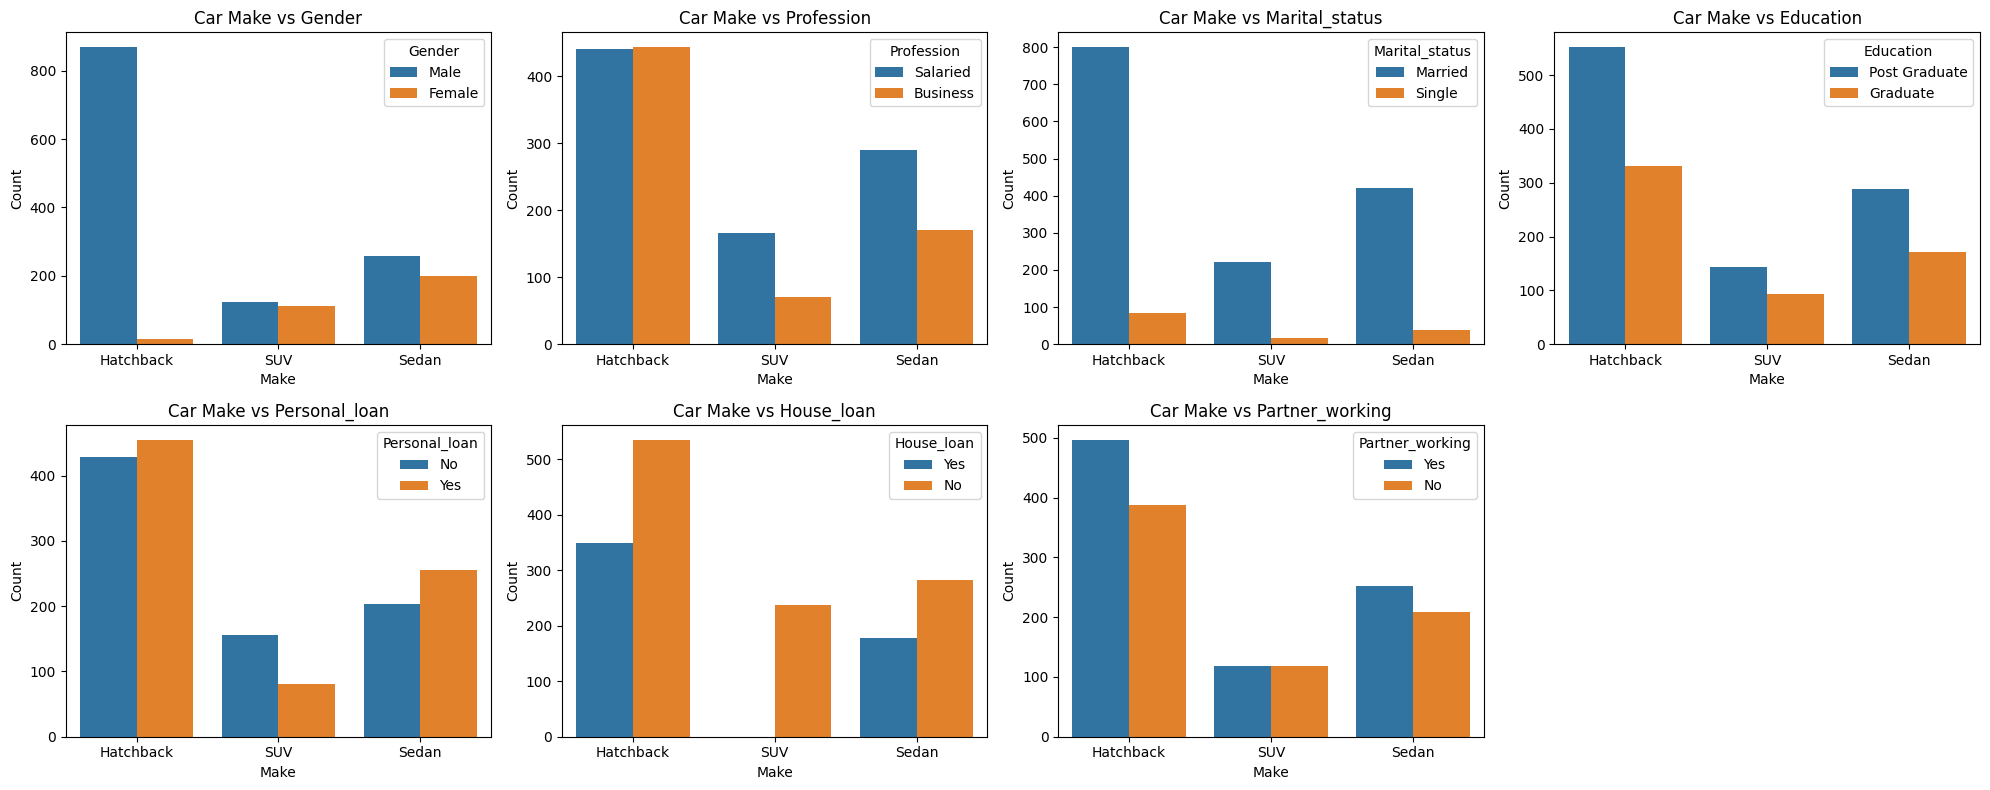

In [17]:
cat_var = ['Gender', 'Profession', 'Marital_status', 'Education', 'Personal_loan', 'House_loan', 'Partner_working']
plt.figure(figsize=(20, 8))

for i, cv in enumerate(cat_var, 1):
    plt.subplot(2, 4, i)
    sns.countplot(data=df, x='Make', hue=cv)
    plt.title(f'Car Make vs {cv}')
    plt.xlabel('Make')
    plt.ylabel('Count')
    plt.legend(title=cv)

# Turn off the 8th empty subplot
plt.subplot(2, 4, 8)
plt.axis('off')

plt.tight_layout()
plt.show()


Hatchback seems to be popular among male. Whereas, SUV and Sedan cars are popular among female since the ratio of male and female customers are not much different. 
Hatchback is equally used by both profession. Whereas, SUV and Sedan are used mostly by salaried customers than the customers having their own business. 
Majority of customers who are married using all three make cars. Apparently, there are less single customers using any of these car make. 
There are not much difference in the ratio of customers by education (Post Graduate & Graduate) using any of these three cars.
Ratio of customers who have not taken personal loan is more in using SUV. Whereas, ratio of customers who have taken personal loan is more in Sedan and Hatchback. 
Apparently, there are no customers for SUV who have taken house loan. Whereas, Hatchback and Sedan are used by both customers (with or without the houseloan) with the ratio of customers without the house loan is more. 
Ratio of customers using SUV for partner working is similar for both. Whereas, ratio of customers using Hatchback and Sedan is more for partner working than not working.

# 4. Insights & Interpretation

### Key Insights

The customer base is largely young, with nearly 75% of buyers under 40, indicating strong demand from early- and mid-career individuals.

Hatchbacks are the most popular car type, while SUVs are the least popular, highlighting a preference for affordable and practical vehicles.

SUV buyers are older, have higher household incomes, higher car prices, and more dependents compared to Hatchback and Sedan buyers.

Age and car price are strongly correlated (0.79), confirming that customers tend to purchase more expensive cars as they age.

Total_salary and Partner_salary show a strong correlation (0.82), validating household income dependency on partner earnings.

Outliers exist in Age, Number of Dependents, and Total Salary, but all represent valid customer segments and do not require removal.

Demographically, the market is dominated by male, married, salaried, and post-graduate customers.

Financing plays an important role: customers buying Sedans and Hatchbacks are more likely to have personal loans, while SUV buyers are less dependent on loans.

### Business Implications

Austo should maintain a strong Hatchback portfolio to capture the high-volume, price-sensitive segment of the US market.

Sedans and SUVs should be positioned as upgrade options, targeting older, higher-income, and family-oriented customers.

Age and income should be key variables in customer segmentation, pricing, and marketing strategies, as higher-income and older customers represent valuable opportunities for premium vehicle sales.

Financing and loan-based offers will be particularly effective for Hatchback and Sedan buyers, whereas SUV buyers may respond better to premium features and value-added services.